#Import libraries

In [1]:
!pip install regex requests hydra-core omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=84d8828920b5eadaf70c12cc3eb8eb180453b161a7f891ed610052beebaf9d18
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [2]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [3]:
import torch
import pandas as pd
from datasets import load_dataset
from transformers import RobertaModel, RobertaTokenizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tải dữ liệu và bộ từ điển từ NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 55.1 MB/s eta 0:00:00


In [5]:
from underthesea import text_normalize

No module named 'fasttext'


#Loading data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
link_train = 'https://raw.githubusercontent.com/kimvo646/NLP/main/train_data.csv'
train = pd.read_csv(link_train, sep='\t', encoding='utf-16')
train.rename(columns={'sentence': 'text', 'sentiment': 'label'}, inplace=True)
train_df = train.drop(columns=['topic'])
train_df

,text,label
0,slide giáo trình đầy đủ .,1
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",1
2,đi học đầy đủ full điểm chuyên cần .,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",1
...,...,...
10963,chỉ vì môn game mà em học hai lần mà không qua...,0
10964,em cảm ơn cô nhiều .,1
10965,giao bài tập quá nhiều .,0
10966,"giáo viên dạy dễ hiểu , nhiệt tình .",1


In [8]:
link_valid = 'https://raw.githubusercontent.com/kimvo646/NLP/main/validation_data.csv'
val = pd.read_csv(link_valid, sep='\t', encoding='utf-16')
val.rename(columns={'sentence': 'text', 'sentiment': 'label'}, inplace=True)
val_df = val.drop(columns=['topic'])
val_df

,text,label
0,giáo trình chưa cụ thể .,0
1,giảng buồn ngủ .,0
2,"giáo viên vui tính , tận tâm .",1
3,"giảng viên nên giao bài tập nhiều hơn , chia n...",0
4,"giảng viên cần giảng bài chi tiết hơn , đi sâu...",0
...,...,...
1505,hướng dẫn lab mơ hồ .,0
1506,thầy cho chúng em những bài tập mang tính thực...,1
1507,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,0
1508,em muốn đổi tên môn học vì tên môn là lập trìn...,0


In [9]:
link_test = 'https://raw.githubusercontent.com/kimvo646/NLP/main/test_data.csv'
test = pd.read_csv(link_test, sep='\t', encoding='utf-16')
test.rename(columns={'sentence': 'text', 'sentiment': 'label'}, inplace=True)
test_df = test.drop(columns=['topic'])
test_df

,text,label
0,nói tiếng anh lưu loát .,1
1,giáo viên rất vui tính .,1
2,cô max có tâm .,1
3,"giảng bài thu hút , dí dỏm .",1
4,"giáo viên không giảng dạy kiến thức , hướng dẫ...",0
...,...,...
2994,"giảng viên rất nhiệt tình , công bằng trong vi...",1
2995,"các slide khó hiểu , ngôn ngữ trong slide phức...",0
2996,giáo viên giảng dạy có tâm huyết .,1
2997,chia sẻ cho em nhiều điều hay .,1


#Data Preprocessing

In [10]:
def dataPreprocessing(df):
   # make all text lowercase
    df['clean_text'] = df['text'].apply(lambda x: x.lower())

    df['clean_text'] = df['clean_text'].apply(lambda x: text_normalize(x))

    df['clean_text'] = df['clean_text'].str.replace(r"[,\.\;\“\:\”\"\'\!\?\-]", " ", regex=True)

    df['clean_text'] = df['clean_text'].str.replace(r"[\.,\?]+$", "", regex=True)

    df['clean_text'] = df['clean_text'].str.replace(r'\s+', " ", regex=True)

    df['clean_text'] = df['clean_text'].apply(lambda x: x.strip())

    return df

In [11]:
processed_data_train = dataPreprocessing(train_df)
processed_data_train

,text,label,clean_text
0,slide giáo trình đầy đủ .,1,slide giáo trình đầy đủ
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",1,nhiệt tình giảng dạy gần gũi với sinh viên
2,đi học đầy đủ full điểm chuyên cần .,0,đi học đầy đủ full điểm chuyên cần
3,chưa áp dụng công nghệ thông tin và các thiết ...,0,chưa áp dụng công nghệ thông tin và các thiết ...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",1,thầy giảng bài hay có nhiều bài tập ví dụ ngay...
...,...,...,...
10963,chỉ vì môn game mà em học hai lần mà không qua...,0,chỉ vì môn game mà em học hai lần mà không qua...
10964,em cảm ơn cô nhiều .,1,em cảm ơn cô nhiều
10965,giao bài tập quá nhiều .,0,giao bài tập quá nhiều
10966,"giáo viên dạy dễ hiểu , nhiệt tình .",1,giáo viên dạy dễ hiểu nhiệt tình


In [12]:
processed_data_val = dataPreprocessing(val_df)
processed_data_val

,text,label,clean_text
0,giáo trình chưa cụ thể .,0,giáo trình chưa cụ thể
1,giảng buồn ngủ .,0,giảng buồn ngủ
2,"giáo viên vui tính , tận tâm .",1,giáo viên vui tính tận tâm
3,"giảng viên nên giao bài tập nhiều hơn , chia n...",0,giảng viên nên giao bài tập nhiều hơn chia nhó...
4,"giảng viên cần giảng bài chi tiết hơn , đi sâu...",0,giảng viên cần giảng bài chi tiết hơn đi sâu h...
...,...,...,...
1505,hướng dẫn lab mơ hồ .,0,hướng dẫn lab mơ hồ
1506,thầy cho chúng em những bài tập mang tính thực...,1,thầy cho chúng em những bài tập mang tính thực...
1507,thầy không dạy nhiều chủ yếu cho sinh viên tự ...,0,thầy không dạy nhiều chủ yếu cho sinh viên tự ...
1508,em muốn đổi tên môn học vì tên môn là lập trìn...,0,em muốn đổi tên môn học vì tên môn là lập trìn...


In [13]:
processed_data_test = dataPreprocessing(test_df)
processed_data_test

,text,label,clean_text
0,nói tiếng anh lưu loát .,1,nói tiếng anh lưu loát
1,giáo viên rất vui tính .,1,giáo viên rất vui tính
2,cô max có tâm .,1,cô max có tâm
3,"giảng bài thu hút , dí dỏm .",1,giảng bài thu hút dí dỏm
4,"giáo viên không giảng dạy kiến thức , hướng dẫ...",0,giáo viên không giảng dạy kiến thức hướng dẫn ...
...,...,...,...
2994,"giảng viên rất nhiệt tình , công bằng trong vi...",1,giảng viên rất nhiệt tình công bằng trong việc...
2995,"các slide khó hiểu , ngôn ngữ trong slide phức...",0,các slide khó hiểu ngôn ngữ trong slide phức t...
2996,giáo viên giảng dạy có tâm huyết .,1,giáo viên giảng dạy có tâm huyết
2997,chia sẻ cho em nhiều điều hay .,1,chia sẻ cho em nhiều điều hay


#Data Visualization

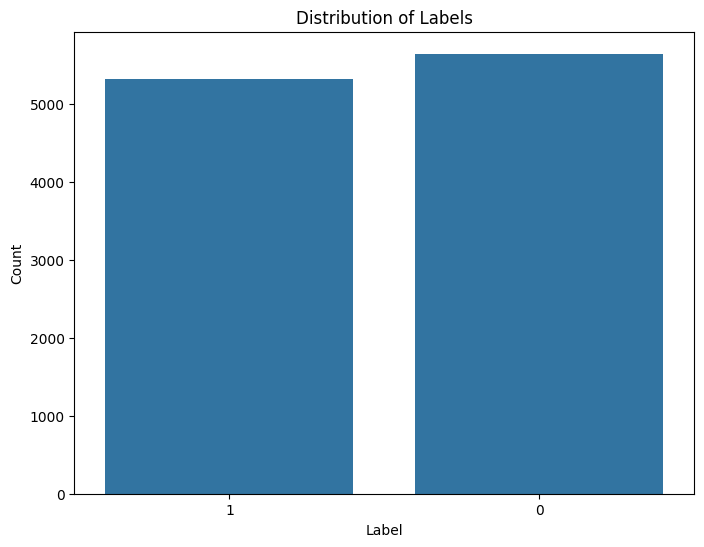

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def dataVisualization(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x="label", data=df)
    plt.title("Distribution of Labels")
    plt.xlabel("Label")
    plt.ylabel("Count")
    labels = df.label.unique()  # Get unique labels from the DataFrame
    plt.xticks(ticks=range(len(labels)), labels=labels)  # Set tick labels
    plt.show()

# Call the function with train_df
dataVisualization(processed_data_train)


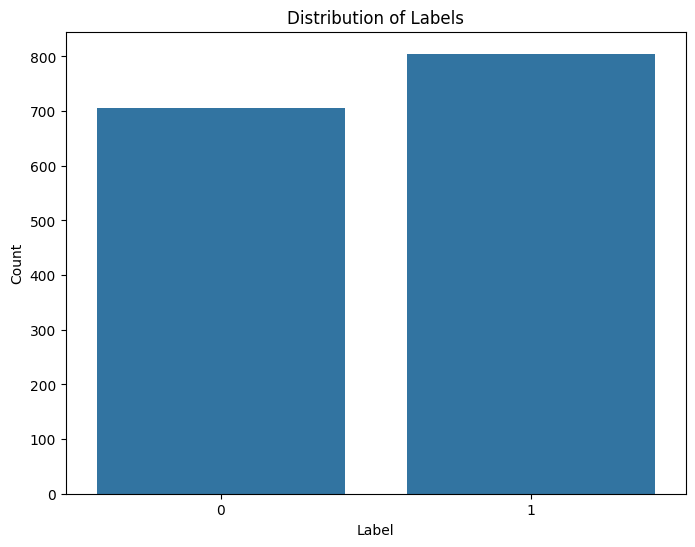

In [15]:
dataVisualization(processed_data_val)

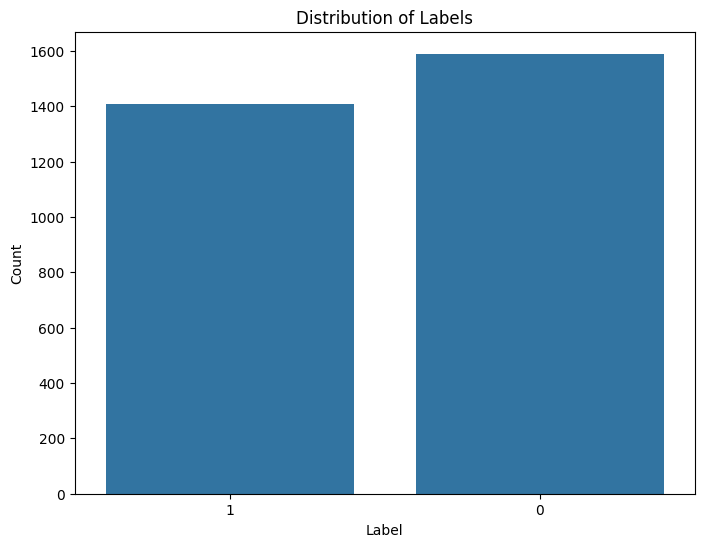

In [16]:
dataVisualization(processed_data_test)

#Layer

## PhoBERT + LSTM

In [17]:
import torch
from transformers import AutoModel, AutoTokenizer
import torch.nn as nn

class PhoBERT_LSTM(nn.Module):
    def __init__(self, tokenizer, model, hidden_size, num_layers, num_classes):
        super(PhoBERT_LSTM, self).__init__()

        # Load pre-trained PhoBERT model and tokenizer
        self.tokenizer = tokenizer
        self.bert_model = model

        # LSTM layer
        self.lstm = nn.LSTM(input_size=self.bert_model.config.hidden_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=True)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)

        # Dense layers
        self.fc1 = nn.Linear(hidden_size * 2, 256)  # hidden_size * 2 for bidirectional LSTM
        self.fc2 = nn.Linear(256, num_classes)

        # Activation function
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_texts):

        # Tokenize the input texts
        inputs = tokenizer(input_texts, return_tensors='pt', padding=True, truncation=True)
        input_ids = inputs['input_ids'].to(self.bert_model.device)
        attention_mask = inputs['attention_mask'].to(self.bert_model.device)

        # Get the embeddings
        with torch.no_grad():
            features = self.bert_model(input_ids, attention_mask=attention_mask)
            hidden_states = features.last_hidden_state


        # LSTM layer
        h0 = torch.zeros(self.lstm.num_layers * 2, hidden_states.size(0), self.lstm.hidden_size).to(hidden_states.device)  # Initial hidden state for bidirectional LSTM
        c0 = torch.zeros(self.lstm.num_layers * 2, hidden_states.size(0), self.lstm.hidden_size).to(hidden_states.device)  # Initial cell state for bidirectional LSTM

        lstm_out, _ = self.lstm(hidden_states, (h0, c0))  # shape: [batch_size, sequence_length, hidden_size * 2]

        # Use the output of the last time step for each sequence in the batch
        lstm_out = lstm_out[:, -1, :]  # shape: [batch_size, hidden_size * 2]

        # Dropout layer
        dropout_out = self.dropout(lstm_out)

        # Fully connected layers
        fc1_out = self.relu(self.fc1(dropout_out))  # shape: [batch_size, 256]
        logits = self.fc2(fc1_out)  # shape: [batch_size, num_classes]

        # Apply softmax activation to get the probability distribution
        output = self.softmax(logits)

        return output

# Example usage
hidden_size = 256
num_layers = 2
num_classes = 2


# Load the PhoBERT model and tokenizer
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
print("LOAD phoBERT DONE")

model = PhoBERT_LSTM(tokenizer, phobert, hidden_size, num_layers, num_classes)

# Dummy input: a list of 16 sentences
input_texts = ["Đây là số " + str(i) for i in range(16)]
output = model(input_texts)

print(output)  # Should print torch.Size([16, num_classes])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


LOAD phoBERT DONE
tensor([[0.4962, 0.5038],
        [0.4917, 0.5083],
        [0.4886, 0.5114],
        [0.4978, 0.5022],
        [0.4930, 0.5070],
        [0.4979, 0.5021],
        [0.4955, 0.5045],
        [0.4909, 0.5091],
        [0.4991, 0.5009],
        [0.5011, 0.4989],
        [0.4874, 0.5126],
        [0.4874, 0.5126],
        [0.4977, 0.5023],
        [0.4930, 0.5070],
        [0.4902, 0.5098],
        [0.4993, 0.5007]], grad_fn=<SoftmaxBackward0>)


# Dataset

In [18]:
import torch
from torch.utils.data import Dataset
from tqdm import tqdm

class TextDataset(Dataset):
    def __init__(self, texts, labels, transform=None):
        """
        texts: List of text samples
        labels: List of labels corresponding to the text samples
        transform: Optional transform to be applied on a sample
        """
        # Loại bỏ các câu có độ dài lớn hơn 512
        filtered_texts = []
        filtered_labels = []
        for text, label in zip(texts, labels):
            if len(text.split()) <= 512:  # Kiểm tra độ dài của câu
                filtered_texts.append(text)
                filtered_labels.append(label)

        self.texts = filtered_texts
        self.labels = filtered_labels
        self.transform = transform

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        label_one_hot = torch.zeros(2)
        label_one_hot[label] = 1
        return text, label_one_hot

def collate_fn(batch):
    texts, labels = zip(*batch)
    return list(texts), torch.stack(labels)

In [19]:
train_texts = processed_data_train['clean_text'].tolist()
train_labels = processed_data_train['label'].tolist()

valid_texts = processed_data_val['clean_text'].tolist()
valid_labels = processed_data_val['label'].tolist()

test_texts = processed_data_test['clean_text'].tolist()
test_labels = processed_data_test['label'].tolist()

In [20]:
train_dataset = TextDataset(train_texts, train_labels)
valid_dataset = TextDataset(valid_texts, valid_labels)
test_dataset = TextDataset(test_texts, test_labels)

In [21]:
print(f'Training dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(valid_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Training dataset size: 10968
Validation dataset size: 1510
Test dataset size: 2999


In [22]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)

In [23]:
batch_text, batch_label = next(iter(train_loader))
print(batch_text)
print(batch_label)

['kiến thức uyên bác và hài hước hay kể chuyện', 'kiến thức chưa nhiều', 'thầy dạy rất nhiệt tình rất mong thầy tiếp tục công tác tại trường', 'gây khó khăn cho việc làm bài thi', 'giảng viên không đảm bảo thời gian lên lớp nghỉ dạy không thông báo trước và thường đến trễ', 'sử dụng khá nhiều thời gian trên lớp để nói về những điều khá căn bản', 'không hiệu quả và khó hiểu trong cách dạy', 'học phòng elab quá rộng phân tán sinh viên làm giảng viên khó tương tác trực tiếp với sinh viên', 'nội dung thực hành vào lý thuyết chưa khớp nhau chưa truyền tải được nhiều kiến thức', 'cô dạy vui kỹ năng nhiệt tình', 'thầy đến tận nơi giảng bài khi không hiểu', 'thầy rất vui', 'nó có nghĩa là ở phòng thực hành mạng có thể áp dung cho một hay hai phòng đều nên có giáo viên trực', 'có nhiều bài toán liên quan thực tiễn', 'giảng viên thân thiện nhiệt tình trong giảng dạy', 'thầy dạy dễ hiểu sinh động']
tensor([[0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [

#Model

## Model_1: Training model

In [24]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

def Train_model(model, loss_fn, optimizer, train_loader, val_loader, num_epochs=10):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Training device: ", device)

    # Chuyển model vào thiết bị hỗ trợ huấn luyện
    model.to(device)
    start_time = time.time()

    for epoch in range(num_epochs):
        print(f'=== EPOCH {epoch+1}/{num_epochs} ===')

        model.train()
        running_loss = 0.0

        # Duyệt từng batch
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
        for i, (batch_input, batch_label) in progress_bar:
            optimizer.zero_grad() # xoá giá trị gradient cũ
            outputs = model(batch_input)
            batch_label = batch_label.squeeze()
            batch_label = batch_label.to(device)
            # print(f"train: batch_label: {batch_label}, output: {output}", )

            loss = loss_fn(outputs, batch_label)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * len(batch_input)

        epoch_loss = running_loss / len(train_loader.dataset)

        # PHA kiểm nghiệm (validation)
        # --> đưa dữ liệu qua tập validation
        model.eval()   # # Đặt chế độ model là eval
        val_loss = 0.0
        val_preds, val_targets = [], []
        with torch.no_grad():
            progress_bar = tqdm(enumerate(val_loader), total=len(val_loader))
            for i, (batch_input, batch_label) in progress_bar:
                batch_label = batch_label.squeeze()
                batch_label = batch_label.to(device)

                outputs = model(batch_input)
                # print(f"val: batch_label: {batch_label}, output: {output}", )
                loss = loss_fn(outputs, batch_label)
                val_loss += loss.item() * len(batch_input)

                _, predictions = torch.max(outputs, 1)
                groung_truth = torch.argmax(batch_label, dim=1)

                val_preds.extend(predictions.cpu().numpy())
                val_targets.extend(groung_truth.cpu().numpy())

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = accuracy_score(val_targets, val_preds)

        print(f'+ Training Loss: {epoch_loss:.4f}, ',
              f'+ Validation Loss: {val_loss:.4f}, ',
              f'+ Validation Accuracy: {val_acc:.4f}')

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Training complete in {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s')

    return model

In [26]:
import torch.optim as optim

hidden_size = 256
num_layers = 1
num_classes = 2

# Load the PhoBERT model and tokenizer
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

# Instantiate the model
model = PhoBERT_LSTM(tokenizer, phobert, hidden_size, num_layers, num_classes)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
# train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=1)
Train_model(model, criterion, optimizer, train_loader, valid_loader, num_epochs=20)

Training device:  cuda
=== EPOCH 1/20 ===


100%|██████████| 95/95 [00:04<00:00, 21.64it/s]


+ Training Loss: 0.5133,  + Validation Loss: 0.5083,  + Validation Accuracy: 0.7907
=== EPOCH 2/20 ===


100%|██████████| 95/95 [00:03<00:00, 27.63it/s]


+ Training Loss: 0.4645,  + Validation Loss: 0.4052,  + Validation Accuracy: 0.9007
=== EPOCH 3/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.07it/s]


+ Training Loss: 0.4368,  + Validation Loss: 0.3860,  + Validation Accuracy: 0.9245
=== EPOCH 4/20 ===


100%|██████████| 95/95 [00:03<00:00, 26.43it/s]


+ Training Loss: 0.4219,  + Validation Loss: 0.3907,  + Validation Accuracy: 0.9212
=== EPOCH 5/20 ===


100%|██████████| 95/95 [00:03<00:00, 27.71it/s]


+ Training Loss: 0.4147,  + Validation Loss: 0.3741,  + Validation Accuracy: 0.9391
=== EPOCH 6/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.45it/s]


+ Training Loss: 0.4038,  + Validation Loss: 0.3715,  + Validation Accuracy: 0.9397
=== EPOCH 7/20 ===


100%|██████████| 95/95 [00:03<00:00, 27.47it/s]


+ Training Loss: 0.4019,  + Validation Loss: 0.3675,  + Validation Accuracy: 0.9444
=== EPOCH 8/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.21it/s]


+ Training Loss: 0.3942,  + Validation Loss: 0.3710,  + Validation Accuracy: 0.9437
=== EPOCH 9/20 ===


100%|██████████| 95/95 [00:03<00:00, 27.90it/s]


+ Training Loss: 0.3954,  + Validation Loss: 0.3642,  + Validation Accuracy: 0.9477
=== EPOCH 10/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.03it/s]


+ Training Loss: 0.3833,  + Validation Loss: 0.3644,  + Validation Accuracy: 0.9483
=== EPOCH 11/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.45it/s]


+ Training Loss: 0.3860,  + Validation Loss: 0.3747,  + Validation Accuracy: 0.9371
=== EPOCH 12/20 ===


100%|██████████| 95/95 [00:03<00:00, 27.41it/s]


+ Training Loss: 0.3904,  + Validation Loss: 0.3628,  + Validation Accuracy: 0.9497
=== EPOCH 13/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.27it/s]


+ Training Loss: 0.3834,  + Validation Loss: 0.3667,  + Validation Accuracy: 0.9450
=== EPOCH 14/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.20it/s]


+ Training Loss: 0.3830,  + Validation Loss: 0.3665,  + Validation Accuracy: 0.9464
=== EPOCH 15/20 ===


100%|██████████| 95/95 [00:03<00:00, 27.72it/s]


+ Training Loss: 0.3852,  + Validation Loss: 0.3657,  + Validation Accuracy: 0.9470
=== EPOCH 16/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.35it/s]


+ Training Loss: 0.3885,  + Validation Loss: 0.3937,  + Validation Accuracy: 0.9179
=== EPOCH 17/20 ===


100%|██████████| 95/95 [00:03<00:00, 27.33it/s]


+ Training Loss: 0.3833,  + Validation Loss: 0.3622,  + Validation Accuracy: 0.9503
=== EPOCH 18/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.30it/s]


+ Training Loss: 0.3805,  + Validation Loss: 0.3615,  + Validation Accuracy: 0.9497
=== EPOCH 19/20 ===


100%|██████████| 95/95 [00:03<00:00, 28.37it/s]


+ Training Loss: 0.3830,  + Validation Loss: 0.3649,  + Validation Accuracy: 0.9483
=== EPOCH 20/20 ===


100%|██████████| 95/95 [00:03<00:00, 27.45it/s]

+ Training Loss: 0.3812,  + Validation Loss: 0.3622,  + Validation Accuracy: 0.9497
Training complete in 11m 25s


PhoBERT_LSTM(
  (bert_model): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(258, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Lay

In [27]:
torch.save(model.state_dict(), f"/content/drive/MyDrive/model_final.pth")

# Model Evaluation

In [28]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, dataloader, device):
    model.eval()  # Chuyển mô hình sang chế độ đánh giá
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            groung_truth = torch.argmax(labels, dim=1)

            # Ghi lại nhãn thực và nhãn dự đoán
            y_true.extend(groung_truth.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Tính các độ đo
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    return accuracy, precision, recall, f1

In [29]:
model.load_state_dict(torch.load("/content/drive/MyDrive/model_final.pth"))

# Chuyển mô hình và dữ liệu sang device (nếu có)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Gọi hàm evaluate_model để đánh giá mô hình
accuracy, precision, recall, f1 = evaluate_model(model, test_loader, device)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9366455485161721
Precision: 0.9361454677326946
Recall: 0.9369794805183211
F1-score: 0.9364802233787914


In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/model_final.pth"))

# Chuyển mô hình và dữ liệu sang device (nếu có)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Gọi hàm evaluate_model để đánh giá mô hình
accuracy, precision, recall, f1 = evaluate_model(model, test_loader, device)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.930643547849283
Precision: 0.9321217460881135
Recall: 0.9290973124255125
F1-score: 0.9301775603605831
